In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D,Conv1D
from tensorflow.keras.models import Model
from tensorflow import keras


In [2]:
tweets = pd.read_csv("Anxiety_sentiment.csv")
tweets.head(20)

,id,message,label
0,0,Does anyone else get these symptoms with anxie...,0
1,1,I headed to the gym just as I do every other d...,1
2,2,When I’m having an episode I can’t enjoy anyth...,0
3,3,So basically I don’t have an amazing relations...,1
4,4,I was getting my nails done &amp; I had to tak...,1
5,5,I just got this big tattoo on the side of my f...,1
6,6,So I think almost two years ago my anxiety sta...,1
7,7,“I HAVE to think this or that.” “You HAVE to d...,1
8,8,For me I either bite my finger or stick my tou...,0
9,9,As a therapist and a specialist with OCD and A...,1


In [3]:
def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [4]:
tweets['message'] = tweets['message'].apply(text_cleaning)

In [5]:
tweets.head(20)

,id,message,label
0,0,Does anyone else get these symptoms with anxie...,0
1,1,I headed to the gym just as I do every other d...,1
2,2,When I’m having an episode I can’t enjoy anyth...,0
3,3,So basically I don’t have an amazing relations...,1
4,4,I was getting my nails done I had to take off...,1
5,5,I just got this big tattoo on the side of my f...,1
6,6,So I think almost two years ago my anxiety sta...,1
7,7,“I HAVE to think this or that.” “You HAVE to d...,1
8,8,For me I either bite my finger or stick my tou...,0
9,9,As a therapist and a specialist with OCD and A...,1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(tweets['message'].values, tweets['label'].values, test_size=0.20)

In [7]:
# instantiating the tokenizer  
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)


In [8]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('Size of datatset vocab is: ', V)

Size of datatset vocab is:  23327


In [9]:
# converting tran and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [1, 13277, 44, 5, 960, 3670, 113, 164, 822, 919, 35, 718, 17, 113, 2882, 115, 5, 641, 2774, 103, 2, 236, 8, 49, 5, 3029, 7, 21, 16, 279, 1664, 23, 392, 87, 303, 22, 5, 2716, 3, 221, 6, 145, 11, 5, 3533, 2, 1107, 92, 22, 6, 1831, 7, 931, 798, 26, 101, 1731, 40, 8, 395, 3, 5, 132, 2, 205, 595, 1701, 1, 102, 173, 68, 976, 1057, 14, 141, 3, 1099, 9, 13, 16, 13278, 3111, 6, 211, 75, 164, 6, 126, 181, 1, 360, 6, 167, 718, 2883, 131, 1155, 60, 8456, 873, 10, 1, 162, 61, 8457, 7446, 2, 16, 6, 1457, 196, 2, 1587, 35, 2828, 195, 115, 10, 18, 42, 329, 2, 127, 509, 609, 3, 49, 2, 44, 47, 940, 2, 4, 75, 1, 325, 3, 10104, 66, 1430, 4, 75, 1, 134, 182, 92, 889, 10, 3203, 3415, 9, 17, 75, 1571, 13279, 517, 79, 293, 14, 9, 3, 28, 13, 117, 642, 616, 17, 9, 14, 6, 275, 126, 19, 169, 73, 61, 3287, 9, 49, 61, 106, 5636, 5238, 9, 24, 118, 2, 90, 160, 420, 6, 246, 41, 7, 2041, 12, 1, 207, 92, 10, 256, 718, 4621, 992, 93, 7, 6, 4914, 273, 44, 6111, 64, 15, 1665, 39, 2, 61, 6112, 3, 82, 450

In [10]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  4388


In [11]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  4388


In [12]:
D = 15
M = 10

# LSTM MODEL 
# x = LSTM(M, return_sequences = True)(x)

i = Input (shape=(T, ))   
x = Embedding(V+1, D,trainable = True)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0

x = Conv1D(M,  kernel_size = 1)(x)
x = GlobalMaxPooling1D()(x)

x = Dense(32, activation='relu')(x)

x = Embedding(V+1, D,trainable = True)(i) 
x = Conv1D(M,  kernel_size = 1)(x)
x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

'''Note: Here D, M are the hyperparameters which mean they can be adjusted as we feel
 to fine-tune the outputs of the model.  
'''

'Note: Here D, M are the hyperparameters which mean they can be adjusted as we feel\n to fine-tune the outputs of the model.  \n'

In [13]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4388)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 4388, 15)          349920    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4388, 10)          160       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 350,091
Trainable params: 350,091
Non-trainable params: 0
_________________________________________________________________


In [15]:
#training the model
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=5)

Epoch 1/5
250/250 [==============================] - 17s 67ms/step - loss: 0.6658 - accuracy: 0.6212 - val_loss: 0.6260 - val_accuracy: 0.6650
Epoch 2/5
250/250 [==============================] - 20s 79ms/step - loss: 0.5715 - accuracy: 0.7109 - val_loss: 0.5507 - val_accuracy: 0.7230
Epoch 3/5
250/250 [==============================] - 17s 66ms/step - loss: 0.4915 - accuracy: 0.7655 - val_loss: 0.5181 - val_accuracy: 0.7335
Epoch 4/5
250/250 [==============================] - 20s 81ms/step - loss: 0.4315 - accuracy: 0.8036 - val_loss: 0.4985 - val_accuracy: 0.7470
Epoch 5/5
250/250 [==============================] - 18s 74ms/step - loss: 0.3779 - accuracy: 0.8378 - val_loss: 0.4948 - val_accuracy: 0.7530


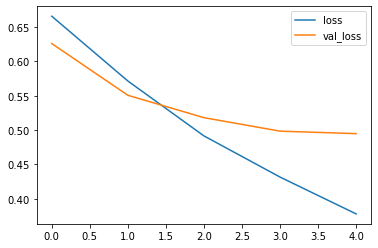

In [16]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

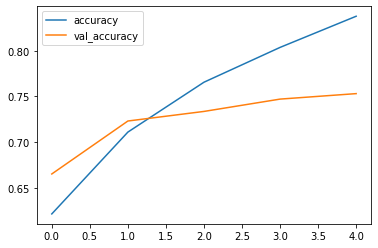

In [17]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [25]:
#model = keras.models.load_model('nice2')

In [18]:
import pickle
f = open('tokanx','wb')
pickle.dump(tokenizer,f)
f.close()

In [19]:
#Prediction
text=["I Happy"]
def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=T)

  # predicting the class
  predicted_sentiment = model.predict(text_pad)
  print(predicted_sentiment)
  predicted_sentiment = model.predict(text_pad).round()
  print(text_seq)
  print(text_pad)

  if predicted_sentiment == 1.0:
    return(print('You may have anxiety'))
  else:
    return(print('You probably do not have anxiety'))
predict_sentiment(text)

[[0.22711894]]
[[1, 310]]
[[  0   0   0 ...   0   1 310]]
You probably do not have anxiety


In [20]:
# saving the model for future purpose
model.save('anxietymod')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: anxietymod\assets


In [21]:
T

4388